<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

## ET5003_CS6134  Machine Learning Applications
## SEM1 2022/3

### ET5003_CS6134 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
October 3rd, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Zheng Hanming
### Student Surname: Zheng
### Student ID: 21225621
### Date of Final Submission: 2022-10-09
***

### Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in the interactive lesson “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 

## The real-life scenario
Let’s suppose that a UL student is taking the ET5003 module “Machine Learning Applications”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

<span style="color:red">TODO: your description goes here</span>

Student's performance, the grade, is the result of multiple factors(independent causes / ancestors):
1. intelligence (low or high)
2. module difficulty (easy, hard)
3. health status (sick or healthy)

To produce a recommendation letter(weak or strong), professor can refer to the below factors(independent causes / ancestors):
1. grade (A, B or C)
2. forum activity (not active, active)

### Step 1.2. Draw and show the DAG (7%)

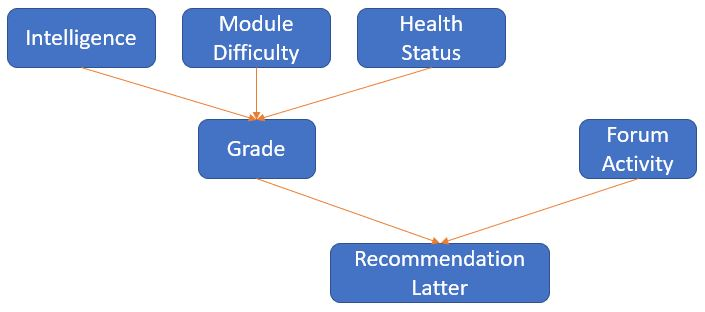

In [632]:
from IPython.display import Image
Image("diagram.JPG")

# ! Typo below Latter should be Letter

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [633]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

# **** define the Bayesian DAG structure
#
# we define the Bayesian structure by connecting nodes (random variables)
# the direction is determined from the order of the nodes
#
# here, electricity_failure, computer_malfunction, and computer_failure are random variables

model = BayesianNetwork([
    ('module_difficulty', 'grade'),
    ('intelligence', 'grade'),
    ('health', 'grade'),
    ('grade', 'recommendation'),
    ('forum', 'recommendation')])


### Step 1.4. Show the DAG of the Bayesian Network (1%)

Kernel crashes running above commented code
Below image is the result of running the above code on Google Colab, Imported as an image


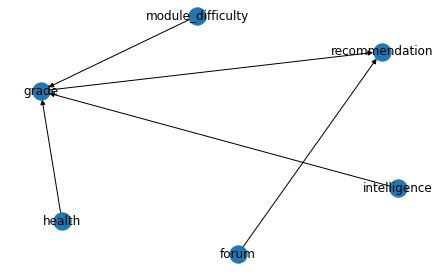

In [634]:
# nx.draw(model, with_labels=True)
# plt.show()
# plt.close()

print("Kernel crashes running above commented code")
print("Below image is the result of running the above code on Google Colab, Imported as an image")
Image("DAG_Diagram.JPG")

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [635]:
from enum import Enum


class Intelligence(Enum):
    LOW = 0
    HIGH = 1


cpd_intelligence = TabularCPD(
    variable="intelligence",
    variable_card=2,
    # p_intel_low = 0.7    p_intel_high = 0.3
    values=[[0.7], [0.3]]
)


class Difficulty(Enum):
    EASY = 0
    HARD = 1


cpd_difficulty = TabularCPD(
    variable="module_difficulty",
    variable_card=2,
    # p_diff_easy = 0.6    p_diff_hard = 0.4
    values=[[0.6], [0.4]]
)


class Health(Enum):
    SICK = 0
    HEALTHY = 1


cpd_health = TabularCPD(
    variable="health",
    variable_card=2,
    # health_sick = 0.05    health_healthy = 0.95
    values=[[0.05], [0.95]]
)


class Grade(Enum):
    A = 0
    B = 1
    C = 2


cpd_grade = TabularCPD(
    variable="grade",
    variable_card=3,
    values=[
        # p_grade_a | p_intel_low ∩ p_diff_easy ∩ health_sick = 0.1,
        # p_grade_a | p_intel_low ∩ p_diff_easy ∩ health_healthy = 0.3,
        # p_grade_a | p_intel_low ∩ p_diff_hard ∩ health_sick = 0.01,
        # p_grade_a | p_intel_low ∩ p_diff_hard ∩ health_healthy = 0.05,
        # p_grade_a | p_intel_high ∩ p_diff_easy ∩ health_sick = 0.7,
        # p_grade_a | p_intel_high ∩ p_diff_easy ∩ health_healthy = 0.9,
        # p_grade_a | p_intel_high ∩ p_diff_hard ∩ health_sick = 0.35,
        # p_grade_a | p_intel_high ∩ p_diff_hard ∩ health_healthy = 0.5,
        [0.1, 0.3, 0.01, 0.05, 0.7, 0.9, 0.35, 0.5],
        # p_grade_b | p_intel_low ∩ p_diff_easy ∩ health_sick = 0.2,
        # p_grade_b | p_intel_low ∩ p_diff_easy ∩ health_healthy = 0.4,
        # p_grade_b | p_intel_low ∩ p_diff_hard ∩ health_sick = 0.04,
        # p_grade_b | p_intel_low ∩ p_diff_hard ∩ health_healthy = 0.25,
        # p_grade_b | p_intel_high ∩ p_diff_easy ∩ health_sick = 0.2,
        # p_grade_b | p_intel_high ∩ p_diff_easy ∩ health_healthy = 0.08,
        # p_grade_b | p_intel_high ∩ p_diff_hard ∩ health_sick = 0.35,
        # p_grade_b | p_intel_high ∩ p_diff_hard ∩ health_healthy = 0.3,
        [0.2, 0.4, 0.04, 0.25, 0.2, 0.08, 0.35, 0.3],
        # p_grade_c | p_intel_low ∩ p_diff_easy ∩ health_sick = 0.7,
        # p_grade_c | p_intel_low ∩ p_diff_easy ∩ health_healthy = 0.3,
        # p_grade_c | p_intel_low ∩ p_diff_hard ∩ health_sick = 0.95,
        # p_grade_c | p_intel_low ∩ p_diff_hard ∩ health_healthy = 0.7,
        # p_grade_c | p_intel_high ∩ p_diff_easy ∩ health_sick = 0.1,
        # p_grade_c | p_intel_high ∩ p_diff_easy ∩ health_healthy = 0.02,
        # p_grade_c | p_intel_high ∩ p_diff_hard ∩ health_sick = 0.3,
        # p_grade_c | p_intel_high ∩ p_diff_hard ∩ health_healthy = 0.2,
        [0.7, 0.3, 0.95, 0.7, 0.1, 0.02, 0.3, 0.2]
    ],
    evidence=["intelligence", "module_difficulty", "health"],
    evidence_card=[2, 2, 2]
)


class Forum(Enum):
    NOT_ACTIVE = 0
    ACTIVE = 1


cpd_forum = TabularCPD(
    variable="forum",
    variable_card=2,
    # forum_inactive = 0.1    forum_active = 0.9
    values=[[0.1], [0.9]]
)


class Recommendation(Enum):
    WEAK = 0
    STRONG = 1


cpd_recommendation = TabularCPD(
    variable="recommendation",
    variable_card=2,
    values=[
        # p_recommendation_weak | p_grade_a ∩ p_forum_inactive = 0.1,
        # p_recommendation_weak | p_grade_a ∩ p_forum_active = 0.05,
        # p_recommendation_weak | p_grade_b ∩ p_forum_inactive = 0.6,
        # p_recommendation_weak | p_grade_b ∩ p_forum_active = 0.5,
        # p_recommendation_weak | p_grade_c ∩ p_forum_inactive = 0.8,
        # p_recommendation_weak | p_grade_c ∩ p_forum_active = 0.7,
        [0.1, 0.05, 0.6, 0.5, 0.8, 0.7],
        # p_recommendation_strong | p_grade_a ∩ p_forum_inactive = 0.9,
        # p_recommendation_strong | p_grade_a ∩ p_forum_active = 0.95,
        # p_recommendation_strong | p_grade_b ∩ p_forum_inactive = 0.4,
        # p_recommendation_strong | p_grade_b ∩ p_forum_active = 0.5,
        # p_recommendation_strong | p_grade_c ∩ p_forum_inactive = 0.2,
        # p_recommendation_strong | p_grade_c ∩ p_forum_active = 0.3,
        [0.9, 0.95, 0.4, 0.5, 0.2, 0.3]
    ],
    evidence=["grade", "forum"],
    evidence_card=[3, 2]
)


### Step 2.2: Associate the distribution models with the network structure (2%)

In [636]:
model.add_cpds(cpd_difficulty, cpd_intelligence, cpd_health, cpd_grade, cpd_forum, cpd_recommendation)

### Step 2.3: Check the model (2%)

In [637]:
model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

In [638]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

### Step 3.1: Infer Posterior Probability of having a grade A (10%)

In [639]:
probability = infer.query(['grade'])
print(probability)
print('** Grade A Probability: {:.4f}'.format(probability.values[Grade.A.value]))

+----------+--------------+
| grade    |   phi(grade) |
+==========+==============+
| grade(0) |       0.3545 |
+----------+--------------+
| grade(1) |       0.2826 |
+----------+--------------+
| grade(2) |       0.3628 |
+----------+--------------+
** Grade A Probability: 0.3545


### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [640]:
probability = infer.query(['recommendation'])
print(probability)
print('** Strong Recommendation Probability: {:.4f}'.format(probability.values[Recommendation.STRONG.value]))

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.4212 |
+-------------------+-----------------------+
| recommendation(1) |                0.5788 |
+-------------------+-----------------------+
** Strong Recommendation Probability: 0.5788


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [641]:
probability = infer.query(['recommendation'], evidence={'forum': Forum.NOT_ACTIVE.value})
print(probability)
print('** Strong Recommendation Probability | Weak Forum Activity: {:.4f}'.format(probability.values[Recommendation.STRONG.value]))

+-------------------+-----------------------+
| recommendation    |   phi(recommendation) |
+===================+=======================+
| recommendation(0) |                0.4953 |
+-------------------+-----------------------+
| recommendation(1) |                0.5047 |
+-------------------+-----------------------+
** Strong Recommendation Probability | Weak Forum Activity: 0.5047
